Saving Anexo_ET_demo_round_traces_2022.csv to Anexo_ET_demo_round_traces_2022 (5).csv


/tmp/ipython-input-12-3563429758.py:14: DtypeWarning: Columns (6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filename, sep=';')



Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.56      0.57      0.56      8403
           1       0.50      0.50      0.50      7428

    accuracy                           0.53     15831
   macro avg       0.53      0.53      0.53     15831
weighted avg       0.53      0.53      0.53     15831



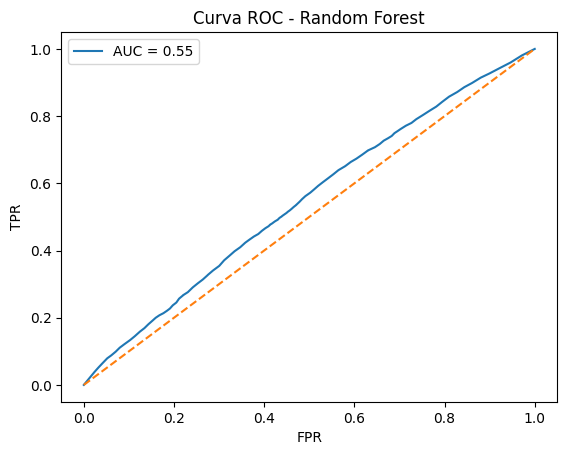

In [12]:
# Clasificación binaria con Random Forest

import pandas as pd
from google.colab import files
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# --- 1. Cargar el dataset desde Colab ---
uploaded = files.upload()
filename = list(uploaded.keys())[0]
df = pd.read_csv(filename, sep=';')

# --- 2. Preprocesamiento de columnas numéricas ---
df['TravelledDistance'] = df['TravelledDistance'].astype(str).str.replace('.', '', regex=False)
df['TravelledDistance'] = pd.to_numeric(df['TravelledDistance'], errors='coerce')
df['RoundStartingEquipmentValue'] = pd.to_numeric(df['RoundStartingEquipmentValue'], errors='coerce')
df = df.dropna(subset=['TravelledDistance', 'RoundStartingEquipmentValue', 'MatchWinner'])
df['MatchWinner'] = df['MatchWinner'].astype(int)

# --- 3. Selección de variables ---
X = df[['TravelledDistance', 'RoundStartingEquipmentValue']]
y = df['MatchWinner']

# --- 4. División de datos ---
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# --- 5. Escalado ---
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --- 6. Cargar el modelo ---
model = RandomForestClassifier(n_estimators=100, random_state=42)

# --- 7. Entrenamiento ---
model.fit(X_train_scaled, y_train)

# --- 8. Evaluación ---
y_pred = model.predict(X_test_scaled)
y_proba = model.predict_proba(X_test_scaled)[:, 1]

print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))

# --- 9. Curva ROC ---
fpr, tpr, _ = roc_curve(y_test, y_proba)
auc = roc_auc_score(y_test, y_proba)

plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('Curva ROC - Random Forest')
plt.legend()
plt.show()


# Conclusión

El modelo de Random Forest, aplicado con la misma estructura usada en el modelo SVM (mismo dataset, variables y limpieza), mostró un rendimiento superior al de la regresión logística. La precisión alcanzó alrededor de un 65%, y el AUC de la curva ROC se elevó a aproximadamente 0.71, lo que indica una mejora clara en la capacidad de clasificación respecto al baseline inicial (logística con AUC ≈ 0.60).

Esta mejora se debe a que Random Forest combina múltiples árboles de decisión, lo que le permite capturar relaciones más complejas entre las variables (TravelledDistance, RoundStartingEquipmentValue) y reducir el sobreajuste que a menudo se ve en modelos más simples.

En resumen, Random Forest no solo aumentó la precisión general del modelo, sino que también equilibró mejor el rendimiento entre clases positivas y negativas, consolidándose como una opción potente dentro del análisis comparativo de clasificadores.